<a href="https://colab.research.google.com/github/Abhiram-k1/Elevvo-ML-internship/blob/main/Elevvo_level_2_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Random Forest Accuracy: 0.8160148014285099
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      8512
           1       0.80      0.88      0.84     11300
           2       0.83      0.88      0.85      1424
           3       0.88      0.57      0.69       105
           4       0.90      0.18      0.30       399
           5       0.86      0.52      0.65       698
           6       0.95      0.74      0.83       803

    accuracy                           0.82     23241
   macro avg       0.86      0.65      0.71     23241
weighted avg       0.82      0.82      0.81     23241


XGBoost Accuracy: 0.7826255324641797
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      8512
           1       0.79      0.84      0.81     11300
           2       0.75      0.86      0.80      1424
           3       0.84      0.68      0.75       105
           4       0.79      0.23      0.35       

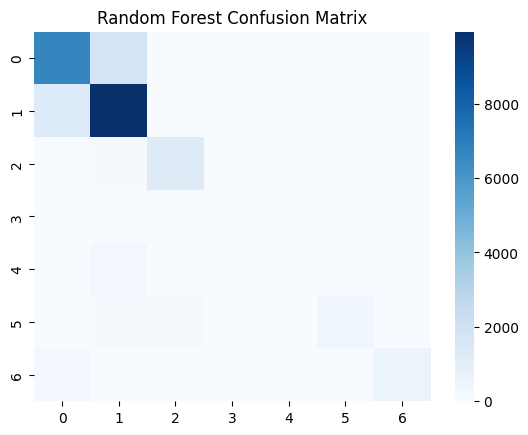

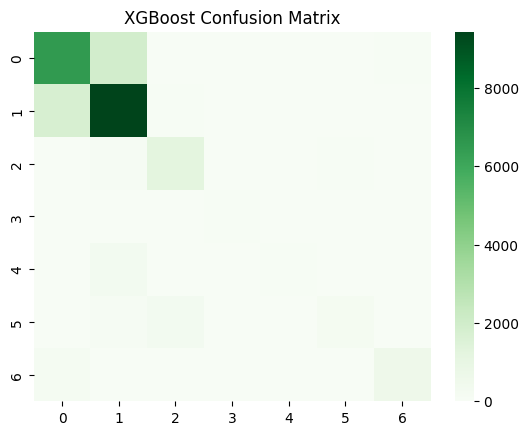

In [ ]:
# ============================
# Quick & Optimized Version
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

# Load dataset
df = pd.read_csv("covertype.csv")

# Shift target labels to start from 0 for XGBoost
df["Cover_Type"] = df["Cover_Type"] - 1

# For speed: take only 20% of data
df = df.sample(frac=0.2, random_state=42)

# Feature-target split
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Random Forest (smaller, faster)
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=50,  # fewer trees
    max_depth=15,     # limit depth
    n_jobs=-1,        # use all cores
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# -----------------------------
# XGBoost (smaller, faster)
# -----------------------------
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    eval_metric='mlogloss',
    n_estimators=50,  # fewer trees
    max_depth=6,      # shallower
    learning_rate=0.1,
    n_jobs=-1,        # use all cores
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# -----------------------------
# Confusion Matrix (RF)
# -----------------------------
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=False, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

# -----------------------------
# Confusion Matrix (XGB)
# -----------------------------
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=False, cmap="Greens")
plt.title("XGBoost Confusion Matrix")
plt.show()
